# Soil Analysis 

Analysis of the soil characteristics of each plot. Data from Soil Conseil, from 10 plots in 2023. 

In [4]:
import pandas as pd
import os

# Statics 
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# set the directory 
os.chdir('/Users/lfloerl/Desktop/MICROTERROIR/curated_data')

# Soil Conseil

In [4]:
df = pd.read_csv('Soil_conseil_2023.csv', index_col=0)

# drop NaN cols and non-numeric ones 
df.dropna(axis=1, inplace=True)
df.drop(columns=['Gravel_Percentage', 'Gravel_Estimate'], axis=1, inplace=True)
df.head()

,Organic_Matter,C_total,Clay_Percentage,Silt_Percentage,Sand_Percentage,N_total,CN_ratio
Plot,,,,,,,
Plot_4,1.9,3.2775,32.9,41.1,26.0,0.13,8.3
Plot_12,3.1,5.3475,34.0,41.3,24.7,0.18,10.0
Plot_9,1.7,2.9325,22.9,42.4,34.7,0.11,9.5
Plot_15,2.6,4.4850,25.6,30.6,43.8,0.16,9.2
Plot_5,1.6,2.7600,29.5,38.5,32.1,0.11,8.7


In [5]:
df_granulo = df[['Clay_Percentage', 'Silt_Percentage', 'Sand_Percentage']]
df_CN = df[['Organic_Matter', 'N_total']]

## Visualizations 
> Heatmap of different characteristics 
> PCA to see if Plots are distinct - does that make sense? 

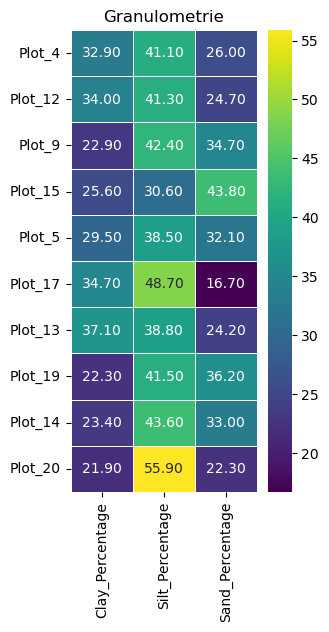

In [6]:
# Heatmap for Granulometrie 
plt.figure(figsize=(3, 6))
sns.heatmap(df_granulo, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)

# Set plot labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Granulometrie')

# Show the plot
plt.show()

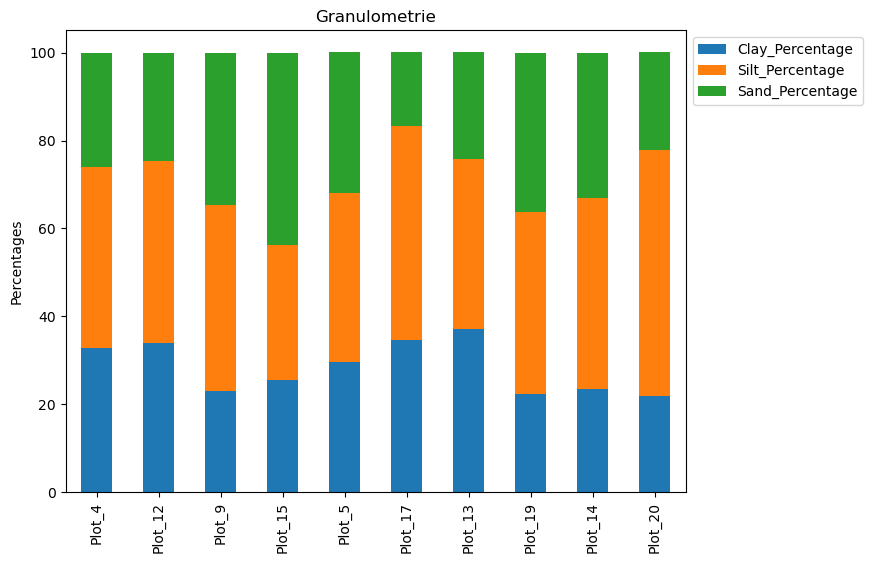

In [7]:
# Create a stacked bar plot for all columns
ax = df_granulo.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add labels and legend
ax.set_ylabel('Percentages')
ax.set_xlabel('')
ax.set_title('Granulometrie')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


In [11]:
df_CN.head()

,Organic_Matter,N_total
Plot,,
Plot_4,1.9,0.13
Plot_12,3.1,0.18
Plot_9,1.7,0.11
Plot_15,2.6,0.16
Plot_5,1.6,0.11


In [13]:
df_reset = df_CN.reset_index()
df_reset    

,Plot,Organic_Matter,N_total
0,Plot_4,1.90,0.13
1,Plot_12,3.10,0.18
2,Plot_9,1.70,0.11
3,Plot_15,2.60,0.16
4,Plot_5,1.60,0.11
5,Plot_17,1.60,0.12
6,Plot_13,1.70,0.12
7,Plot_19,3.70,0.20
8,Plot_14,3.00,0.18
9,Plot_20,1.12,0.12


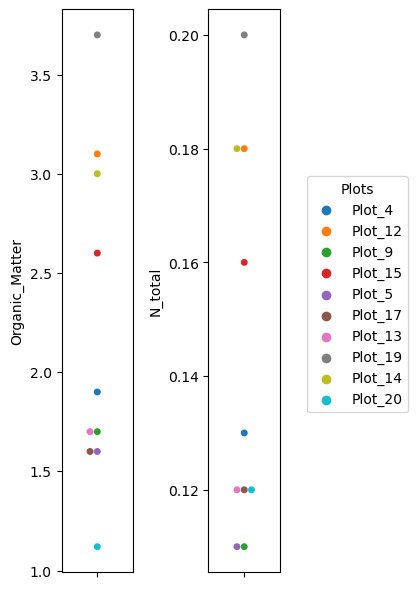

In [38]:
# Swarmplot of the C and N measurements 
fig, axes = plt.subplots(1, 2, figsize=(3, 6))

#sns.swarmplot(ax=axes[0], data=df_reset, y='Organic_Matter', hue="Plot")
#sns.swarmplot(ax=axes[1], data=df_reset, y='N_total', hue="Plot")


for i, column in enumerate(['Organic_Matter', 'N_total']):
    ax = sns.swarmplot(y=column, data=df_reset, hue="Plot", ax=axes[i])
    ax.get_legend().remove()  # Remove individual legends in each subplot

# Add a single legend to the side
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.4, 0.5), borderaxespad=0.5, title='Plots')

plt.tight_layout()
plt.show()

### PCA
... this is not really helpful 
--> maybe shows that none of the plots cluster tightly together when it comes to their soil characteristics, good spread? 

In [24]:
# scale the data to the range between 0 and 1 before using PCA
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df)

In [25]:
# explaine 95% of variance
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

data_pca = df.copy()

# Add PCA results to dataframe
data_pca['PC1'] = reduced[:, 0]
data_pca['PC2'] = reduced[:, 1]

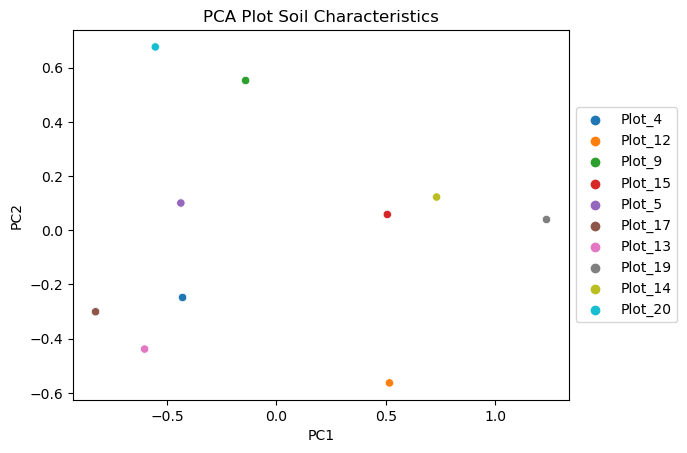

In [31]:
# Plot scatterplot with colors based on Plot 
sns.scatterplot(data=data_pca, x='PC1', y='PC2',hue=data_pca.index)
plt.title('PCA Plot Soil Characteristics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Soil pH 

In [12]:
df = pd.read_csv('Soil_pH_LavauxColonialization_2024-01-16.csv', index_col=0)

df.head()

,Date_Sample,pH,Date_measurement,Location,Plot,Unnamed: 6
SAMPLE_NAME,,,,,,
Lavaux_2021-08-31_soil_Plot4,31.08.21,7.55,05.12.23,Lavaux,Lavaux_Plot4,NaN
Lavaux_2021-08-31_soil_Plot5,31.08.21,7.53,05.12.23,Lavaux,Lavaux_Plot5,NaN
Lavaux_2021-08-31_soil_Plot9,31.08.21,7.55,05.12.23,Lavaux,Lavaux_Plot9,NaN
Lavaux_2021-08-31_soil_Plot11,31.08.21,7.47,05.12.23,Lavaux,Lavaux_Plot11,NaN
Lavaux_2021-08-31_soil_Plot12,31.08.21,7.40,05.12.23,Lavaux,Lavaux_Plot12,NaN


## All soil pH 

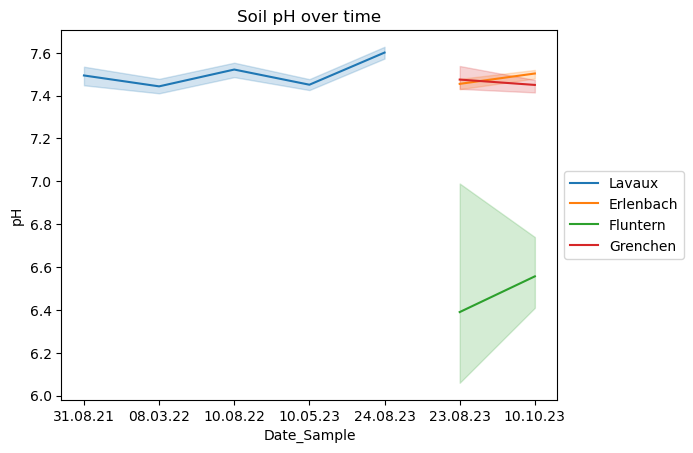

In [9]:
# Plot scatterplot with colors based on Plot 
sns.lineplot(data=df, x='Date_Sample', y='pH', hue=df.Location)
plt.title('Soil pH over time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Lavaux soil pH

In [16]:
# filter df to only contain Lavaux samples
Lavaux_pH = df[df["Location"] == "Lavaux"]
Lavaux_pH.head()

,Date_Sample,pH,Date_measurement,Location,Plot,Unnamed: 6
SAMPLE_NAME,,,,,,
Lavaux_2021-08-31_soil_Plot4,31.08.21,7.55,05.12.23,Lavaux,Lavaux_Plot4,NaN
Lavaux_2021-08-31_soil_Plot5,31.08.21,7.53,05.12.23,Lavaux,Lavaux_Plot5,NaN
Lavaux_2021-08-31_soil_Plot9,31.08.21,7.55,05.12.23,Lavaux,Lavaux_Plot9,NaN
Lavaux_2021-08-31_soil_Plot11,31.08.21,7.47,05.12.23,Lavaux,Lavaux_Plot11,NaN
Lavaux_2021-08-31_soil_Plot12,31.08.21,7.40,05.12.23,Lavaux,Lavaux_Plot12,NaN


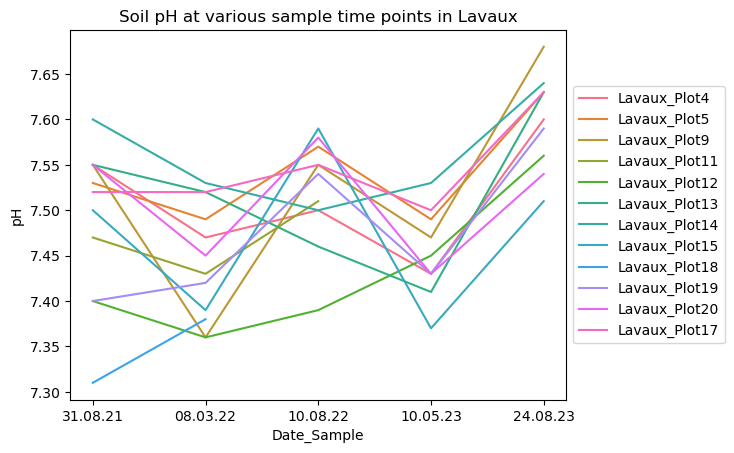

In [19]:
# Plot scatterplot with colors based on Plot 
sns.lineplot(data=Lavaux_pH, x='Date_Sample', y='pH', hue=Lavaux_pH.Plot)
plt.title('Soil pH at various sample time points in Lavaux')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Soil Colonialization pH

--> does the pH become "more narrow" over time after vineyards were planted? 

In [21]:
# filter df to only contain Lavaux samples
SC_pH = df[df["Location"] != "Lavaux"]
SC_pH.head()

,Date_Sample,pH,Date_measurement,Location,Plot,Unnamed: 6
SAMPLE_NAME,,,,,,
Erlenbach_2023-08-23_1,23.08.23,7.50,17.11.23,Erlenbach,Erlenbach_1,NaN
Erlenbach_2023-08-23_2,23.08.23,7.48,17.11.23,Erlenbach,Erlenbach_2,NaN
Erlenbach_2023-08-23_3,23.08.23,7.43,14.11.23,Erlenbach,Erlenbach_3,NaN
Erlenbach_2023-08-23_4,23.08.23,7.44,14.11.23,Erlenbach,Erlenbach_4,NaN
Erlenbach_2023-08-23_5,23.08.23,7.47,17.11.23,Erlenbach,Erlenbach_5,NaN


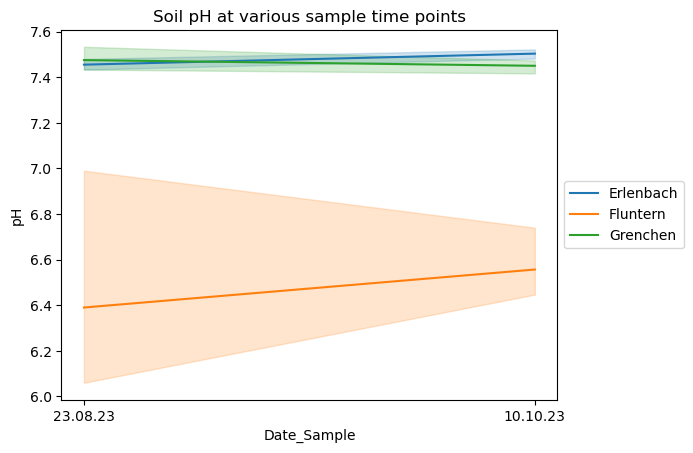

In [23]:
# Plot scatterplot with colors based on Plot 
sns.lineplot(data=SC_pH, x='Date_Sample', y='pH', hue=SC_pH.Location)
plt.title('Soil pH at various sample time points')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()